#### CSE 452: Neural Networks and Fuzzy Systems Lab
Summer-2020, Dept. of CSE, NEUB <br>

#### Student Info
<b>Name:</b> Syed Jafrul Husen<br>
<b>Reg. No:</b> 170103020013

### Assignment 5: Fully Connected Layer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix ,  accuracy_score
from sklearn import datasets 

<b>Toy data</b>

In [2]:
X=np.array([[1, 2], [4, 5], [12, 7], [16, 10], [20, 5], [5, 8]  ])
y=np.array([[0,1], [0,1], [1,0], [1,0],  [0,1], [1,0] ])
print(X.shape, y.shape)

(6, 2) (6, 2)


In [3]:
print(y)

[[0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]]


<b>Softmax</b>
$$Let, a=[a_0, a_1, a_2, ..]$$
$$S_i=\frac{e^{a_i}}{\sum_{k=0}^{N} {e^{a_k}}}$$

<b>Task 1: Implement Softmax</b> <br>
1. Implement both ways: Using loop and Without using loop. <br>
2. What challanges did you face?
3. Check output manually.

In [4]:
z=np.array( [ [1.2, 1.6], [2.4, 3.4],  [3.8, 5.8],  [5.1, 7.8],  [4. , 6.6],   [3.4, 4.8]])
print(z)

[[1.2 1.6]
 [2.4 3.4]
 [3.8 5.8]
 [5.1 7.8]
 [4.  6.6]
 [3.4 4.8]]


In [5]:
#your code goes here.
#Softmax implementation using loop
a = np.zeros([2])
A = []
for i in range(len(z)):
    a[0] = np.exp(z[i,0])/(np.exp(z[i,0])+np.exp(z[i,1]))
    a[1] = np.exp(z[i,1])/(np.exp(z[i,0])+np.exp(z[i,1]))
    A.append([a[0],a[1]])
    #print(a)
A=np.array(A)
print(A)

[[0.40131234 0.59868766]
 [0.26894142 0.73105858]
 [0.11920292 0.88079708]
 [0.06297336 0.93702664]
 [0.06913842 0.93086158]
 [0.19781611 0.80218389]]


In [6]:
#Softmax Implementation without using loop
from sklearn.utils.extmath import softmax
library_A = softmax(z)
print(library_A)

[[0.40131234 0.59868766]
 [0.26894142 0.73105858]
 [0.11920292 0.88079708]
 [0.06297336 0.93702664]
 [0.06913842 0.93086158]
 [0.19781611 0.80218389]]


<b>Task 2: calculate feedforward output</b><br><br>
$A=softmax(X.w+b)$

Output should look like the following. <br>

[[0.401 0.599] <br>
 [0.269 0.731] <br>
 [0.119 0.881] <br>
 [0.063 0.937] <br>
 [0.069 0.931] <br>
 [0.198 0.802]]

In [7]:
b=np.array([0.5, 0.6])
w=np.array([ [0.1,0.2], [0.3,0.4] ])

In [8]:
#your code goes here.
z=np.dot(X,w)+b
print(z)

[[1.2 1.6]
 [2.4 3.4]
 [3.8 5.8]
 [5.1 7.8]
 [4.  6.6]
 [3.4 4.8]]


In [9]:
A=softmax(z)
print(A)

[[0.40131234 0.59868766]
 [0.26894142 0.73105858]
 [0.11920292 0.88079708]
 [0.06297336 0.93702664]
 [0.06913842 0.93086158]
 [0.19781611 0.80218389]]


<b>Task 3: calculate log loss</b><br><br> 
Note: <b>without using any loop.</b> <br>
$$L_i = - y_i* \sum \log (A_i)$$
\begin{equation*}
L =\frac{1}{N} \sum_i L_i 
\end{equation*}

Output should look like the following. <br>
Loss: [0.513 0.313 2.127 2.765 0.072 1.62 ] <br>
average loss: 1.2351

In [10]:
#your code goes here.
#Loss calculation using loop
loss=[]
for i in range(len(y)):
    t = (-y[i,0] * np.log(A[i,0])) - (y[i,1] * np.log(A[i,1]))
    loss.append(t)
print('Loss: ',loss)
avg_loss=np.mean(loss)
print('Average loss: ',avg_loss)

Loss:  [0.5130152523999524, 0.3132616875182228, 2.126928011042973, 2.7650435617765905, 0.07164469196766994, 1.620417409918451]
Average loss:  1.2350517691039766


In [11]:
#Loss calculation without using loop
loss=np.sum(-y*np.log(A),axis=1)
print('Loss: ',loss)
avg_loss=np.mean(loss)
print('Average loss: ',avg_loss)

Loss:  [0.51301525 0.31326169 2.12692801 2.76504356 0.07164469 1.62041741]
Average loss:  1.2350517691039766


<b>Task 4: calculate gradient</b><br>
Note: <b>calculate dz, dw, db without using loop</b> </br>
$$dz=A-y$$ 
$$dw=\frac{1}{N} ( X^T.dz )$$   
$$db=\frac{1}{N} \sum dz $$ 

Dimension check: y-yh= (2xN).(NX2)=(2x2) 

dw should look like below, <br>
[[-4.452,  4.452], <br>
[-3.243,  3.243]])

db should look like below<br>
[[-0.313,  0.313]]

In [12]:
#your code goes here.
dz=A-y

𝑑𝑤=np.dot(𝑋.𝑇,𝑑𝑧)/len(dz)

𝑑b=np.mean(dz,axis=0)

print('dz = ',dz,'\n')
print('dw = ',dw,'\n')
print('db = ',db,'\n')

dz =  [[ 0.40131234 -0.40131234]
 [ 0.26894142 -0.26894142]
 [-0.88079708  0.88079708]
 [-0.93702664  0.93702664]
 [ 0.06913842 -0.06913842]
 [-0.80218389  0.80218389]] 

dw =  [[-4.45217737  4.45217737]
 [-3.2433822   3.2433822 ]] 

db =  [-0.3134359  0.3134359] 



<b>Task 5: Train the network using gradient descent optimization</b>

In [13]:
lr=0.01
epoch=1000

In [14]:
#init w and b randomly.
D=X.shape[1]
C=y.shape[1]
w = 0.01 * np.random.randn(D,C)
b = np.zeros((1,C))

 1. Init w and b randomly
 2. repeat the following
     3. calculate feedforward output
     4. calculate gradient
     5. update w and b (w=w-lr\*dw,  b=b-lr*db)
     6. calculate loss and keep track.

7. After training plot the loss
8. test prediction on the X data

In [15]:
#your code goes here.
avg_loss=[]

for i in range(epoch):
    z=np.dot(X,w)+b
    A=softmax(z)
    dz=A-y
    𝑑𝑤=np.dot(𝑋.𝑇,𝑑𝑧)/len(dz)
    𝑑b=np.mean(dz,axis=0)
    
    w=w-lr*dw 
    b=b-lr*db
    loss=np.sum(-y*np.log(A),axis=1)
    avg_loss.append(np.mean(loss))

In [16]:
#print(avg_loss)

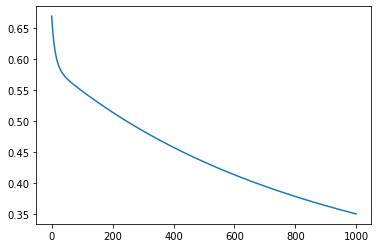

In [17]:
plt.plot(avg_loss)

In [18]:
z=np.dot(X,w)+b
A=softmax(z)

print('w = ',w,'\n')
print('b = ',b,'\n')
print('A = ',A,'\n')

w =  [[-0.05502454  0.05483907]
 [ 0.28493685 -0.29635987]] 

b =  [[-1.04548663  1.04548663]] 

A =  [[0.26148906 0.73851094]
 [0.59292147 0.40707853]
 [0.65920206 0.34079794]
 [0.87698419 0.12301581]
 [0.20072617 0.79927383]
 [0.8818516  0.1181484 ]] 



In [19]:
k=0
for i in A:
    idx=i.tolist().index(max(i))
    A[k]=([0 if j!=idx else 1 for j in range(len(i))])
    k+=1


print("predicted \n",A,'\n')
print("Original \n",y)

cunt=0
for i,j in zip(A,y):
    result= i==j
    if(all(result)):
        cunt+=1

print('\n',"Accuracy :-> ",(cunt/len(y))*100,"%")

predicted 
 [[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]] 

Original 
 [[0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]]

 Accuracy :->  83.33333333333334 %


<b>Digits Data</b>

In [20]:
datas=datasets.load_digits()
data=datas['data']
label=datas['target'] 

In [21]:
X,X_test, y, y_test=train_test_split(data, label, test_size = 0.2)
print('Training shape:', X.shape, y.shape)
print('Testing shape:',X_test.shape, y_test.shape)

Training shape: (1437, 64) (1437,)
Testing shape: (360, 64) (360,)


In [22]:
N,D=X.shape            #num_data, data_dimension
C=np.max(y)+1          #number of classes

In [23]:
C

10

In [24]:
y

array([7, 4, 9, ..., 1, 7, 0])

<b>Task 6: Train on the digits data [Note: y is not one-hot vector now]</b>
1. Train a two layer[Input, Output] network
2. Plot loss, tune learning rate, number of epochs
3. predict on test data and show accuracy.  [accuracy should be above 90%]
4. Play with the learning rate and number of epochs [try few values]

In [25]:
#your code goes here.
#init w and b randomly.
w = 0.01 * np.random.randn(D,C)
b = np.zeros((1,C))
y_hot=np.zeros((N,C))
y_hot[range(N),y]=1

print('y = ',y,'\n')
print('y hot = ',y_hot)

y =  [7 4 9 ... 1 7 0] 

y hot =  [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [26]:
avg_loss=[]
for i in range(epoch):
    z=np.dot(X,w)+b
    A=softmax(z)
    dz=A-y_hot
    𝑑𝑤=np.dot(𝑋.𝑇,𝑑𝑧)/len(dz)
    𝑑b=np.mean(dz,axis=0)
    
    w=w-lr*dw 
    b=b-lr*db
    
    loss=np.sum(-y_hot*np.log(A),axis=1)
    avg_loss.append(np.mean(loss))

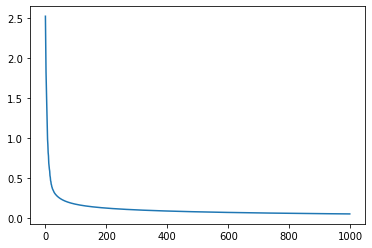

In [27]:
plt.plot(avg_loss)

In [28]:
z=np.dot(X,w)+b
A=softmax(z)

print('w = ',w,'\n')
print('b = ',b,'\n')
print('A = ',A)

w =  [[ 4.55559195e-03 -1.83561842e-02  3.55061489e-03  9.53299691e-03
  -6.94447938e-03  4.99315217e-03 -5.25697698e-03  2.96088098e-03
   9.08568538e-04 -4.03472919e-03]
 [ 2.51624229e-03  7.00562974e-03  8.32110582e-03  2.09571987e-03
  -1.29122751e-02  4.43849227e-02 -1.02360694e-02  1.61209408e-02
  -8.84526733e-03 -1.91129965e-02]
 [-2.89843055e-02 -3.27913677e-02  4.60828393e-02 -1.11118104e-02
  -4.88331221e-02  1.97618437e-01 -9.93047049e-02  2.93252312e-02
  -1.53094159e-02 -3.93662313e-02]
 [ 4.89455734e-02  2.70665563e-02  2.02228766e-03  3.80920556e-02
  -1.54620765e-01 -4.09120888e-02 -4.12474433e-02  6.86351674e-02
  -7.54164586e-02  9.05089515e-02]
 [-2.12774592e-03 -2.19574125e-01  1.37078112e-02  1.69118453e-01
  -8.47457028e-02  3.57492296e-02 -2.14906348e-02  7.28563306e-02
   4.06470448e-03  4.33859608e-02]
 [-6.78304395e-02  7.94454678e-02 -2.15379828e-02  6.71757417e-02
  -1.47953013e-01  1.51215937e-01 -7.33996631e-02  6.41606222e-02
  -2.82295658e-03 -4.2767931

In [29]:
k=0
for i in A:
    idx=i.tolist().index(max(i))
    A[k]=([0 if j!=idx else 1 for j in range(len(i))])
    k+=1


print('\n',"predicted \n",A)
print("Original \n",y_hot)

cunt=0
for i,j in zip(A,y_hot):
    result= i==j
    if(all(result)):
        cunt+=1

print('\n',"Accuracy :-> ",(cunt/len(y_hot))*100,"%")


 predicted 
 [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
Original 
 [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]

 Accuracy :->  99.30410577592205 %


### Submission

1. Complete The Honor Code
2. Submit this notebook file to google classroom.

<b>Comment on google classroom if you have any questions</b>

### Honor Code
Plese type the following in the next cell. Replace the underlined text with your own. 

I am <u>Syed Jafrul Husen</u> bearing registration no. <u>170103020013</u> hereby declaring that I myself did my assignments, I didn't directly copy any code from others. I have a complete understanding of my code and can explain. I respect this honor code and I believe it will be useful to maintain academic integrity.<br>

Name: <u>Syed Jafrul Husen</u><br>
Date: <u>01/09/20</u>

_your__writing_